## 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gc

2024-05-25 21:58:56.081856: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## 2. Print TensorFlow Version and Check GPU Availability

In [4]:
# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Get the list of physical devices
physical_devices = tf.config.experimental.list_physical_devices("GPU")

# Check if any GPU devices are available
if len(physical_devices) > 0:
    print("GPU device found")
    print("GPU device name:", physical_devices[0].name)
    print("Number of GPUs available:", len(physical_devices))

    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

else:
    print("GPU device not found")

TensorFlow version: 2.4.1
GPU device found
GPU device name: /physical_device:GPU:0
Number of GPUs available: 1


## 3. Load MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 4. Preprocess Data

### 4.1 Normalize the Training and Testing Data

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

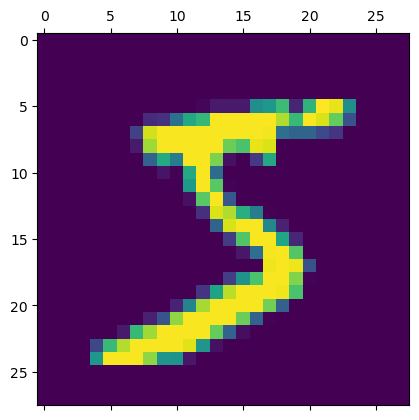

In [9]:
plt.matshow(X_train[0])

## 5. Reshape Training and Testing Data

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

## 6. Build the Neural Network Model

### 6.1 Define Model Architecture

In [14]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation="relu"),
        # keras.layers.Dense(10, input_shape=(784,), activation="sigmoid"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)

### 6.2 Specify Optimizer, Loss Function, and Metrics

In [15]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

### 6.3 Create TensorBoard Callback

In [16]:
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir="./logs/", histogram_freq=1)

2024-05-25 21:59:46.306644: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2024-05-25 21:59:46.306730: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2024-05-25 21:59:46.495509: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2024-05-25 21:59:48.047391: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2024-05-25 21:59:49.004753: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2024-05-25 21:59:49.005239: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


## 7. Train the Model

In [18]:
model.fit(X_train, y_train, epochs=20, callbacks=[tb_callback])

Epoch 1/20
  68/1875 [>.............................] - ETA: 4s - loss: 0.0118 - accuracy: 0.9940

2024-05-25 22:02:43.581356: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2024-05-25 22:02:43.770521: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2024-05-25 22:02:43.770552: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2024-05-25 22:02:43.770617: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2024-05-25 22:02:43.773142: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2024-05-25 22:02:43.773735: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2024-05-25 22:02:43.774294: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2024-05-25 22:02

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9986
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accurac

## 8. Evaluate the ModeL


In [19]:
model.evaluate(X_test, y_test)
# model.evaluate(X_test_flattened, y_test)

2024-05-25 22:04:12.278893: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9778


[0.14003142714500427, 0.9778000116348267]

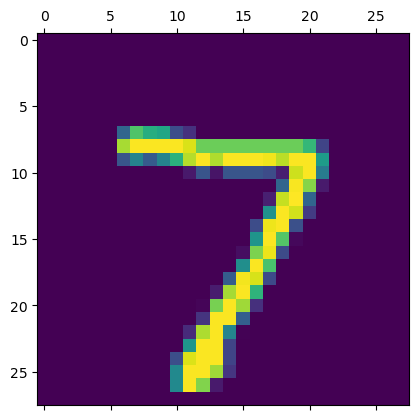

In [20]:
plt.matshow(X_test[0])

## 9. Make Predictions

### 9.1 Predict Using the Model

In [21]:
y_predict = model.predict(X_test)
# y_predict = model.predict(X_test_flattened)
y_predict[0]

2024-05-25 22:04:17.822406: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


array([1.9010404e-10, 1.0851292e-08, 3.0453566e-01, 8.3971638e-03,
       1.3904115e-18, 3.8877113e-11, 2.9092197e-18, 1.0000000e+00,
       2.0808842e-07, 5.6196891e-06], dtype=float32)

### 9.2 Convert Predictions to Labels

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### 9.3 Get the Index of the Maximum Probability

In [24]:
np.argmax(y_predict[0])

7

## 10. Compute Confusion Matrix

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    1,    0,    2,    0,    2,    0],
       [   0, 1126,    3,    0,    0,    0,    3,    0,    3,    0],
       [   8,    2, 1003,    3,    1,    0,    3,    3,    8,    1],
       [   0,    1,    3,  989,    0,    4,    0,    3,    8,    2],
       [   2,    0,    4,    0,  959,    0,    4,    1,    3,    9],
       [   2,    1,    0,   14,    1,  863,    2,    1,    6,    2],
       [  10,    2,    4,    1,    4,    4,  929,    0,    4,    0],
       [   3,    3,   14,    3,    2,    0,    0,  991,    6,    6],
       [   8,    1,    5,    6,    3,    1,    2,    4,  941,    3],
       [   5,    4,    0,    2,    6,    2,    0,    7,    7,  976]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

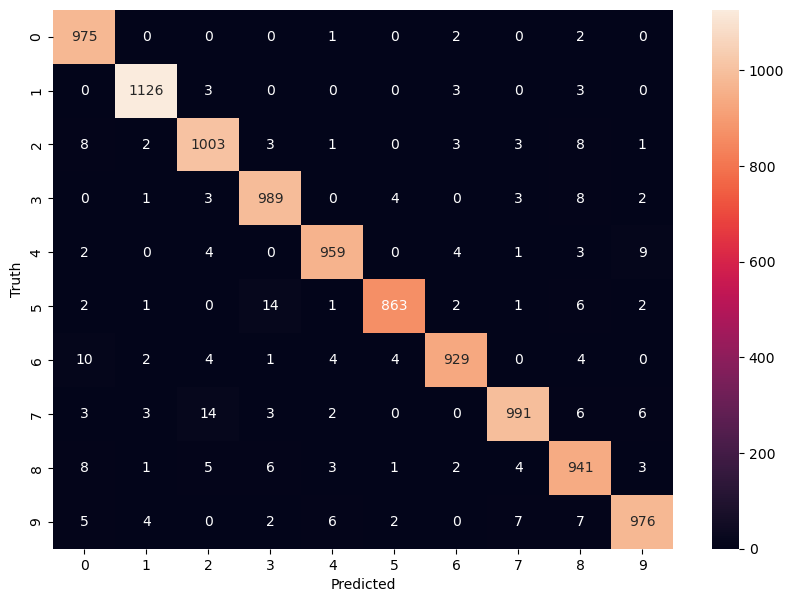

In [26]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")